In [185]:
import pandas as pd
import os
import random
from shutil import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
#parameters
root_directory = r'/home/disk/eos4/jkcm/Data/MEASURES/sample_root_dir'
desired_number_of_scenes_per_region_and_season = 1000
minimum_valid_scenes_per_granule = 20

def make_new_manifest(manifest, unique_granules):
    new_manifest = pd.DataFrame(columns=manifest.columns)
    print('loading {} scenes into new manifest...\n'.format(desired_number_of_scenes_per_region_and_season))
    while len(new_manifest) < desired_number_of_scenes_per_region_and_season:
        new_granule, count = random.choice(list(unique_granules.items()))
        if count < minimum_valid_scenes_per_granule: # don't include granules with only a few valid scenes. NOTE: This might introduce a bias?  
            del unique_granules[new_granule]
            continue
        print(len(new_manifest), end="\r")
        matching_rows = manifest[manifest['granule'] == new_granule]
        new_manifest = new_manifest.append(matching_rows, ignore_index=True)
        del unique_granules[new_granule]
    return(new_manifest)

In [215]:
sum(unique_granules.values())

2599

In [205]:
def subsample_from_directory(root_directory):

    all_regions_and_seasons_dirs = [i for i in os.listdir(root_directory) if i[:4]=='2012'] # hardcoding in a pattern match here
    new_root_directory = os.path.join(root_directory, 'new_subset_{}_members'.format(desired_number_of_scenes_per_region_and_season))
    if os.path.exists(new_root_directory):
        new_root_directory += '_'+(str(random.getrandbits(32)))
        print('new root directory already exists, making a random one at {}'.format(os.path.basename(new_root_directory)))
    os.makedirs(new_root_directory)

    for folder in all_regions_and_seasons_dirs:
        print('working on ' + folder)
        os.makedirs(os.path.join(new_root_directory, folder))
        manifest_file = os.path.join(root_directory, folder, folder+'_manifest.csv')
        manifest = pd.read_csv(manifest_file)
        manifest['granule'] = [i[:22] for i in manifest['name']]
        granules = [i[:22] for i in manifest['name']]
        unique_granules = {i: 0 for i in set(granules)}
        for g in granules:
            unique_granules[g] += 1
        #creating new manifest from subselection
        new_manifest = make_new_manifest(manifest, unique_granules)
        print('writing manifest...')

        new_manifest.to_csv(os.path.join(new_root_directory, folder, folder+'_manifest.csv'), index=False)


        #copying over files
        files_to_copy = np.concatenate((new_manifest['context_img'].values, new_manifest['refl_img'].values))
        files_to_copy = ['test.bmp']
        print("copying over {} files...".format(len(files_to_copy)))
        for f in files_to_copy:
            copy(os.path.join(root_directory, folder, f), os.path.join(new_root_directory, folder, f))
        print("done")




working on 2012-10_Southeast_Pacific
loading 1000 scenes into new manifest...
writing manifest...
copying over 1 files...
done


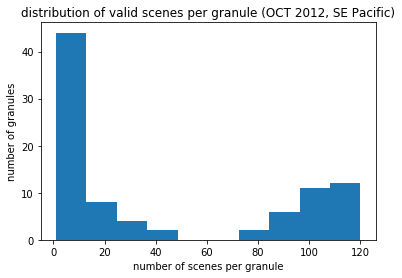

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(unique_granules.values())
ax.set_ylabel("number of granules")
ax.set_xlabel("number of scenes per granule")
ax.set_title("distribution of valid scenes per granule (OCT 2012, SE Pacific)")
fig.savefig(r"/home/disk/p/jkcm/plots/measures/valid_scenes_per_granule.png")

(array([3.448e+03, 9.200e+01, 4.400e+01, 3.500e+01, 2.500e+01, 1.500e+01,
        1.900e+01, 1.800e+01, 1.000e+00, 6.000e+00]),
 array([0.        , 0.01832886, 0.03665771, 0.05498657, 0.07331543,
        0.09164429, 0.10997314, 0.128302  , 0.14663086, 0.16495972,
        0.18328857]),
 <a list of 10 Patch objects>)

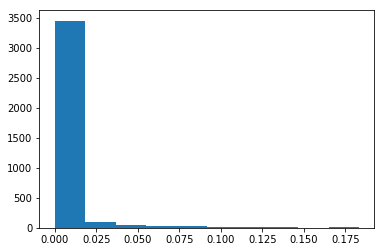

In [10]:
plt.hist(manifest['high_cf'])

In [206]:
pd.read_csv(r'/home/disk/eos4/jkcm/Data/MEASURES/sample_root_dir')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [208]:
x = r'/home/disk/eos4/jkcm/Data/MEASURES/sample_root_dir/new_subset_1000_members/2012-10_Southeast_Pacific/test.bmp'

In [211]:
os.listdir(os.path.dirname(x))

['test.bmp']

In [227]:
        unique_granules = {i: 0 for i in set(granules)}
        for g in granules:
            unique_granules[g] += 1

In [228]:
x = unique_granules.copy()

In [229]:
len(x)

89

In [230]:
c = 0
while True:
        print(c)
        new_granule, count = random.choice(list(x.items()))
        c += count
        del x[new_granule]
        if len(x) == 0:
            print('ran out of granules, stopping at {} scenes'.format(c))
            break


0
114
200
206
221
232
311
312
424
429
432
434
435
542
659
663
667
684
774
884
904
934
946
1059
1074
1192
1298
1409
1411
1413
1510
1511
1629
1631
1730
1733
1740
1854
1869
1906
1998
2100
2188
2198
2202
2203
2204
2209
2210
2211
2326
2333
2437
2520
2528
2555
2557
2560
2591
2593
2605
2607
2711
2715
2829
2840
2847
2934
2936
2940
2959
2960
3063
3100
3114
3215
3217
3221
3319
3427
3523
3643
3647
3654
3680
3682
3684
3685
3690
ran out of granules, stopping at 3703 scenes


In [249]:
import data_subsetter as ds
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [251]:
ds.subsample_from_directory(ds.root_directory)

no manifest file found at /home/disk/eos4/jkcm/Data/MEASURES/sample_root_dir/new_subset_1000_members/2012-10_Southeast_Pacific/2012-10_Southeast_Pacific_manifest.csv, will process that directory
working on 2012-10_Southeast_Pacific
loading 1000 scenes into new manifest...

writing manifest...
copying over 2214 files...


FileNotFoundError: [Errno 2] No such file or directory: '/home/disk/eos4/jkcm/Data/MEASURES/sample_root_dir/2012-10_Southeast_Pacific/MYD02HKM.A2012303.1945.061_index_0000_index_0256.context.png'